In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [66]:
df = pd.read_csv('../Data/Mall_Customers.csv')

In [67]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [68]:
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [69]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [70]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(X)

c:\Users\nyoma\miniconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [71]:
predicted_cluster = kmeans.predict(X)

In [72]:
sil_score = silhouette_score(X, predicted_cluster)
sil_score

np.float64(0.4937945814354117)

### Memilih K Terbaik
1. Bruteforce
2. Elbow Method

In [73]:
from sklearn.metrics import silhouette_score

best_score = -1
best_k = 0
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"Cluster {k} = Silhouette Score = {score:.4f}")

    if score > best_score:
        best_score = score
        best_k = k

print(f"\nJumlah cluster terbaik: {best_k} dengan Silhouette Score = {best_score:.4f}")

c:\Users\nyoma\miniconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nyoma\miniconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nyoma\miniconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nyoma\miniconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

Cluster 2 = Silhouette Score = 0.3956
Cluster 3 = Silhouette Score = 0.4676
Cluster 4 = Silhouette Score = 0.4938
Cluster 5 = Silhouette Score = 0.5539
Cluster 6 = Silhouette Score = 0.5128
Cluster 7 = Silhouette Score = 0.5017
Cluster 8 = Silhouette Score = 0.4963
Cluster 9 = Silhouette Score = 0.4559
Cluster 10 = Silhouette Score = 0.4426

Jumlah cluster terbaik: 5 dengan Silhouette Score = 0.5539


c:\Users\nyoma\miniconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nyoma\miniconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nyoma\miniconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nyoma\miniconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

In [74]:
# Elbow method
elbow_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    elbow_scores.append(kmeans.inertia_)



c:\Users\nyoma\miniconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nyoma\miniconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nyoma\miniconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nyoma\miniconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

**Apa itu `kmeans.inertia_`?**

`kmeans.inertia_` adalah jumlah total jarak kuadrat (sum of squared distances) antara setiap data point dan centroid klusternya. Nilai ini mengukur seberapa baik data dikelompokkan oleh model KMeans: semakin kecil inertia, semakin rapat data dalam kluster. Pada Elbow Method, kita mencari jumlah kluster (K) di mana penurunan inertia mulai melambat (membentuk "siku"/elbow), yang menandakan K optimal.

In [75]:
elbow_scores

[269981.28,
 183653.3289473684,
 106348.37306211119,
 73880.64496247195,
 44448.45544793371,
 40825.16946386946,
 33642.579220779226,
 26686.83778518778,
 24766.471609793443,
 23103.122085983916]

In [76]:
import seaborn as sns

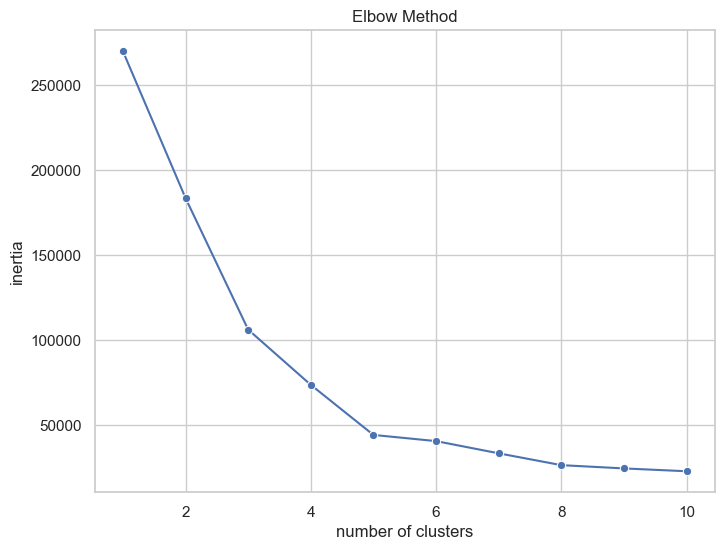

In [77]:
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(1, 11), y=elbow_scores, marker='o')
plt.title('Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

In [ ]:
k_optimal = 6
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
kmeans.fit(X)

c:\Users\nyoma\miniconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [79]:
clust_prediction = kmeans.predict(X)

In [80]:
sil_score = silhouette_score(X, clust_prediction)
sil_score

np.float64(0.553931997444648)

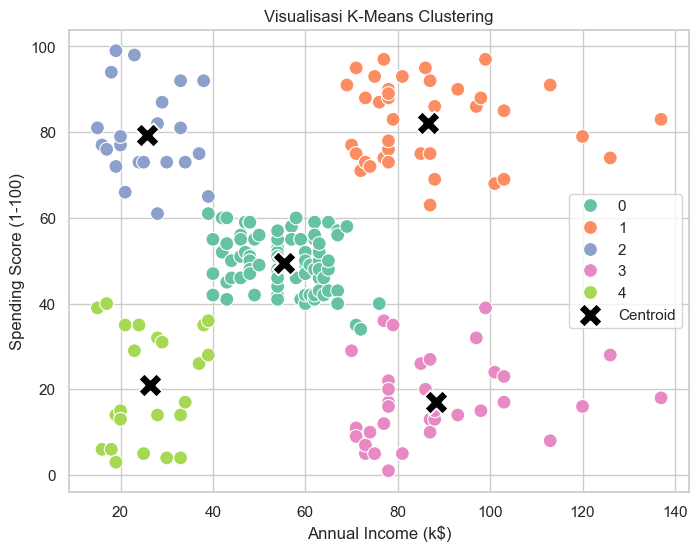

In [81]:
df_plot = pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
df_plot["Cluster"] = clust_prediction

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="Set2",
    s=100
)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=["Annual Income (k$)", "Spending Score (1-100)"])
sns.scatterplot(
    data=centers,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    s=300,
    color="black",
    marker="X",
    label="Centroid"
)

plt.title("Visualisasi K-Means Clustering")
plt.legend()
plt.show()